# **AP155 Lab Assignment** 
## Module 2: Integrals and Derivatives

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible. 

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points** (Problems 1 to 5 are worth 20, 20, 10, 30, and 20 points, respectively).

_Due Date_: **5PM of October 8 (Thu)**



### Student Information 

_Full Name (Last Name, First Name)_: Rangel, Jerico Miguel \
_Student No._: 2018-11666\
_Section_: WFU-2

### Submission Information

_Date and Time Submitted (most recent upload)_: 10/08/2020 8:00 AM

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name:** Jerico Miguel Tapang Rangel

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: **XX**/100

Score breakdown:
* Problem 1 - XX/20
* Problem 2 - XX/20
* Problem 3 - XX/10
* Problem 4 - XX/30
* Problem 5 - XX/20

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_ 

### PROBLEM 1 (20 pts.) 
**Integration using the trapezoidal rule and Simpson's rule**

Calculate the integral of the function $ 2x^4 + 3x^2 + 4x + 5$ from $x=0$ to $x=5$.

1. Do the numerical calculation using the trapezoidal rule with 10, 100, and 1,000 slices. Describe each step of the calculation clearly and concisely. *(8 pts.; 4 pts. for the code & 4 pts. for the discussion text)*

2. What are the percentage errors of your answers in (1)? *(2 pts.)*

3. Repeat the calculation using Simpson's rule with 10, 100, and 1,000 slices. Describe each step of the calculation clearly and concisely. *(8 pts.;  4 pts. for the code & 4 pts. for the discussion text)*

4. What are the percentage errors of your answers in (3)? How do they compare with the results from (1) for the same number of slices? *(2 pts.)*

1. To set-up, I defined the function given as f(x) and I set the lower and upper limit as x1 and x2 respectively. The next part of the code is a nested for loop, where the outer loop is used to run the main loop for the different amount of slices. The main calculation occurs in the inner for loop, where I sum the base lengths of each trapezoid. This is iterated using the variable n which starts at 1, up til N+1 to reach the appropriate number of slices. The final approximation is then printed as the total area which is given by $A =\frac{(b)(width)}{2}$ where b is the total sum of the base lengths.

2. The error margin is also calculated and printed using the formula $ $%$ error = \frac{|expected - obtained|}{expected} 100$%$ $.

In [36]:
def f(x):
  return 2*x**4 + 3*x**2 + 4*x + 5
x1 = s = 0
x2 = 5
for N in [10,100,1000]:
  width = (x2-x1)/N
  for n in range(1,N+1):
    A = f((n-1)*width)+f(n*width)
    s = s + A
  print("The trapezoidal sum with",N,"slices is",width*0.5*s)
  print("  %error =",100*(abs(1450 - width*0.5*s)/1450),"%")
  s=0


The trapezoidal sum with 10 slices is 1471.4375
  %error = 1.478448275862069 %
The trapezoidal sum with 100 slices is 1450.2145812500003
  %error = 0.014798706896569988 %
The trapezoidal sum with 1000 slices is 1450.0021458331246
  %error = 0.000147988491350808 %


3. The general sequencing of the code is similar as in (1), the main difference is within the inner for loop. I used modulo to determine whether the n was odd or even for a given nth iteration, which determined whether the multiplier to that base length would be 4 or 2. It is generalized in Simpson's rule that apart from the first and last term of the summation, the odd terms have a multiplier of 4 while the even terms have a multiplier of 2. I added the first and last terms seperately from the bulk of the summation to make it simpler. In printing the final approximation, the formula is exactly the same except it is divided by 3 instead of 2, i.e. $A =\frac{(b)(width)}{3}$.

4. Using the same error margin formula, it can be seen that for all cases (N=10,100,1000),  Simpson's rule is far more precise.

In [37]:
def f(x):
  return 2*x**4 + 3*x**2 + 4*x + 5
x1 = s = 0
x2 = 5
for N in [10,100,1000]:
  width = (x2-x1)/N
  for n in range(1,N):
    if n%2 == 1:
      k = 4
    else: k = 2
    A = k*f(n*width)
    s = s + A   
  s = s + f(x1) + f(x2)
  print("The Simpson's rule sum with",N,"slices is",width*(1/3)*s)
  print("  %error =",100*(abs(1450 - width*(1/3)*s)/1450),"%")
  s=0


The Simpson's rule sum with 10 slices is 1450.0833333333333
  %error = 0.005747126436776382 %
The Simpson's rule sum with 100 slices is 1450.0000083333332
  %error = 5.747126343866794e-07 %
The Simpson's rule sum with 1000 slices is 1450.0000000008333
  %error = 5.7470656586168655e-11 %


### PROBLEM 2 (20 pts.)

**Integration using the adaptive trapezoidal rule method and Romberg integration**

Calculate the integral $ I = \int_0^1 \sin^2 \sqrt{100x} \mbox{d}x $.

1. Do the numerical calculation using the adaptive trapezoidal rule method to an approximate accuracy of $\epsilon = 10^{-6}$. Start with one single integration slice and work up from there to two, four, eight, and so forth. Save and print out the number of slices, its estimate of the integral, and its estimate of the error on the integral, for each value of the number of slices $N$, until the target accuracy is reached. *(8 pts.; 4 pts. for the code & 4 pts. for the discussion text)*

2. Repeat the calculation using the Romberg integration technique. Save and print out the same variables as in (1). *(8 pts.; 4 pts. for the code & 4 pts. for the discussion text)*

3. Compare the results from both calculations by creating a plot of error estimates vs. $N$. Annotate your chart completely (include proper axis labels and legend). Describe how the trends for the two techniques compare. *(4 pts.; 2 pts. for the chart & 2 pts. for the discussion text)*

1. After importing the necessary packages and defining the given function, I added several variables to be used in the main loop. I also added data arrays to be used for the error margin plot in problem 2.3. The main code consists of two loops. The outer loop is used to check whether the error margin calculated has already reached an approximate accuracy of $ 10^{-6}$. The number of slices keeps doubling as long as this condition is not satisfied. I then choose the initial number of slices as 1, and solve it using the normal trapezoidal rule. The next lines of code use the derived formula for calculation of only the odd terms $ I_i = \frac{1}{2}I_{i-1} + h_i\sum_{n_{odd}}^{N-1} f(a+ kh_i)
$, which is half as much as usual. The error is also calculated using the generalization given this method $\epsilon_i = \frac{1}{3}(I_i - I_{i-1})$. The necessary information is then printed out. The target accuracy is reached at N = 4096 slices.

In [38]:
import numpy as np
import math 
def f(x):
  return (np.sin(math.sqrt(100*x)))**2
x1 = s = s1 = A = k = a = 0
x2 = N = error = 1
data1 = np.zeros(13,float)
data3 = np.zeros(13,float)
while error > 10**(-6):
  width = (x2-x1)/N
  if N == 1:
    a = f(0) + f(1)
    s = 0.5*width*a
  else:
    s1 = s
    for n in range(1,N):
      if n%2 == 1:
        A = A + f(n*width)
    s = 0.5*s1 + width*A
  error = abs((1/3)*(s-s1))
  print("Sum with",N,"slices is",s)
  print("  error =",error)
  print(" ")
  data1[k] = error
  data3[k] = N
  N = 2*N
  k += 1
  A = 0



Sum with 1 slices is 0.147979484546652
  error = 0.049326494848883996
 
Sum with 2 slices is 0.3252319078064746
  error = 0.05908414108660753
 
Sum with 4 slices is 0.5122828507233315
  error = 0.06235031430561895
 
Sum with 8 slices is 0.4029974484782483
  error = 0.03642846741502771
 
Sum with 16 slices is 0.43010336929474696
  error = 0.009035306938832883
 
Sum with 32 slices is 0.4484146657874699
  error = 0.0061037654975743165
 
Sum with 64 slices is 0.4539129312153758
  error = 0.001832755142635293
 
Sum with 128 slices is 0.45534850437280205
  error = 0.000478524385808754
 
Sum with 256 slices is 0.455711266453241
  error = 0.00012092069347964991
 
Sum with 512 slices is 0.45580219965166413
  error = 3.0311066141042176e-05
 
Sum with 1024 slices is 0.45582494813241997
  error = 7.582826918613635e-06
 
Sum with 2048 slices is 0.45583063620164654
  error = 1.8960230755242038e-06
 
Sum with 4096 slices is 0.455832058278271
  error = 4.740255414859007e-07
 


2. After the initial setup of values, packages and the given function, I define a 2d array or a matrix in order to map out the values from the Romberg integration algorithm. I also defined a separate data array for the error margin plot in problem 2.3. Similar to earlier, the outer loop consists of the error margin checker, and the inner loop consists of the generalized algorithm. I separate the first two iterations (N=1 and N=2) and acquire ther sums using the normal trapezoidal rule. This is because they cannot be applied to the generalization, and their values are required for it to begin. The main assigning of values occurs at the innermost for loop, where the value assigning equation moves one row down per value of N. For each row, it also moves from left to right up to the most accurate value of $I_{i,i}$. This is designated as $I_{i-1,i-1}$ in the code since the 2d array starts at a value of 0 instead of 1. The corresponding equations for the value assigner and error are given by: 
$$\begin{equation}
R_{i,m+1} = R_{i,m} + \frac{1}{4^m -1}(R_{i,m} -R_{i-1,m}) \\ error = \frac{1}{4^m -1}(R_{i,m} -R_{i-1,m})
\end{equation}
$$ for any ith iteration with $i≥2$, $i≥m$ and $i ≠ m$ for the error calculation, since no value will exist. The necessary information is then printed out. Target accuracy is reached at N = 128 slices. It is important to note that even though the approximation is precise up to 6 decimal places at N = 64 slices, the code will still run for N = 128 since the error margin is not perfectly precise due to the adjustment made to generalize or estimate the error.

In [39]:
import numpy as np
import math 
def f(x):
  return (np.sin(math.sqrt(100*x)))**2
x1 = s = A = k = m = p = 0
x2 = N = error = i = 1
nmax = 10
R = np.zeros([nmax,nmax],float)
data2 = np.zeros(13,float)
while error > 10**(-6):
  width = (x2-x1)/N
  for n in range(1,N+1):
    A = f((n-1)*width)+f(n*width)
    s += A
  R[k,0] = 0.5*width*s
  if k>=1:
    for index in range(0,k):
      R[i,m+1] = R[i,m] + (1/(4**(m+1)-1)*(R[i,m]-R[i-1,m]))
      m += 1
    p = m
    m = 0
    i += 1 
    error = abs((1/(4**p)-1)*(R[i-1,i-2] - R[i-2,i-2]))
    print("Sum with",N,"slices is",R[i-1,i-1])
    print("  error =",error)
    print(" ")
    data2[k] = error
  else:
    error = abs(0.455832 - width*0.5*s)/0.455832
    print("Sum with",N,"slices is",R[k,0])
    print("  error =",error)
    print(" ")
  s=0
  N = 2*N
  k += 1

Sum with 1 slices is 0.147979484546652
  error = 0.6753639837776813
 
Sum with 2 slices is 0.38431604889308213
  error = 0.13293931744486695
 
Sum with 4 slices is 0.5873209727713417
  error = 0.17842229637737655
 
Sum with 8 slices is 0.34897386185747614
  error = 0.2309569539104327
 
Sum with 16 slices is 0.4458037647108328
  error = 0.09607489674437736
 
Sum with 32 slices is 0.455777492231097
  error = 0.009954257095388956
 
Sum with 64 slices is 0.45583249446137875
  error = 5.49753770023976e-05
 
Sum with 128 slices is 0.4558325323050134
  error = 3.783901520023144e-08
 


3. Using the general plotting syntax, I used basic color coding and log scaling on the axes to see the trends better. Both graphs can be seen as starting in a rather parabolic manner, but the trend for Romberg integration slopes down faster and much more abruptly. The trend for the adaptive trapezoidal rule's errors on the other hand, continue to decrease at a linear pace. It can be seen as well that the approximation methods of Romberg integration is much more efficient at almost the same precision while only needing around half as much code iterations. 

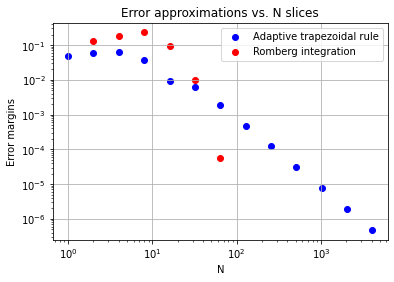

In [40]:
import matplotlib.pyplot as plt
import numpy as np
#print(data1)
#print(data2)
plt.grid()
plt.xscale("log")
plt.yscale("log")
plt.scatter(data3,data1, color ='blue',label='Adaptive trapezoidal rule')
plt.scatter(data3,data2, color ='red',label='Romberg integration')
plt.legend(loc='upper right', frameon=True)
plt.ylabel("Error margins")
plt.xlabel("N")
plt.title("Error approximations vs. N slices")
plt.show()

### PROBLEM 3 (10 pts.)

**Integration using Gaussian quadrature**

Calculate the integral from Problem 1 using the Gaussian quadrature method: $ 2x^4 + 3x^2 + 4x + 5$ from $x=0$ to $x=5$.

1. Define the function $\tt gaussxw$ from Appendix E of the Newman text (and run the cell). *(2 pts.)*

2. Calculate the integral using the $\tt gaussxw$ function in (1) and number of slices $N = 3$. Describe each step in the calculation clearly and concisely. *(8 pts.; 4 pts. for the code & 4 pts. for the discussion text)*

1. The gaussxw function works by taking in a number of slices N and returning two arrays. One containing the x points and the other with their corresponding weights.

2. After defining the function and adjusting it for any x interval $[a,b]$, I defined the given polynomial as f(x). I defined the necessary values for N, a, and b, and designated arrays to take in the values outputted by the adjusted gausswx function. The formula for the integral is then approximated by the summation $S = \sum_{k=1}^{N} w_kf(x_k)\$. Array1 contains the values for x while array2 contains the values for w. All thats left is to use a for loop to multiply the corresponding function values and weights and then sum them up.

In [41]:
from numpy import ones,copy,cos,tan,pi,linspace
def gaussxw(N):
  a = linspace(3,4*N-1,N)/(4*N+2)
  x = cos(pi*a + 1/(8*N*N*tan(a)))
  epsilon = 1e-15
  delta = 1.0
  while delta>epsilon:
    p0 = ones(N,float)
    p1 = copy(x)
    for k in range(1,N):
      p0,p1 = p1,((2*k+1)*x*p1-k*p0)/(k+1)
    dp = (N+1)*(p0-x*p1)/(1-x*x)
    dx = p1/dp
    x -= dx
    delta = max(abs(dx))
  w = 2*(N+1)*(N+1)/(N*N*(1-x*x)*dp*dp)
  return x,w

def g(N,a,b): 
  x,w = gaussxw(N)
  return 0.5*(b-a)*x+0.5*(b+a), 0.5*(b-a)*w

def f(x):
  return 2*x**4 + 3*x**2 + 4*x + 5
N = 3
a = s = 0
b = 5
array1,array2=g(N,a,b)
for k in range(0,N):
  s += f(array1[k])*array2[k]
print("The value of the integral is",s)



The value of the integral is 1450.000000000002


### PROBLEM 4 (30 pts.)

**Physics Application: Anharmonic Oscillator**

_Refer to Exercise 5.10 of the Newman text._ Consider an anharmonic oscillator with potential $V(x)$ symmetric about $x = 0$. Let us set our anharmonic oscillator going with amplitude $a$. That is, at $t = 0$ we release it from rest at position $x = a$ and it swings back towards the origin. Then at $t = 0$ we have $dx/dt = 0$ and the equation for its total energy becomes $E = V(a)$, i.e., the total energy of the particle is given in terms of the amplitude.

When the particle reaches the origin for the first time, it has gone through one quarter of a period of the oscillator. The period $T$ is given by: $$ T = \sqrt{8m} \int_0^a \frac{dx}{\sqrt{V(a)-V(x)}}. $$

1. Suppose the potential is $V(x) = x^4$ and the mass of the particle is $m = 1$. Write a Python function that calculates the period of the oscillator for given amplitude a using Gaussian quadrature with $N = 20$ points. Describe each step clearly and concisely. *(16 pts.; 8 pts. for the code & 8 pts. for the discussion text)*

2. Use your function to make a graph of the period for amplitudes ranging from $a = 0$ to $a = 2$. Describe the behavior you find and explain these results clearly and concisely. *(14 pts.; 7 pts. for the plot & 7 pts. for the discussion text)*

1. I started by defining the gaussxw function and and adjusting it for any interval $[a,b]$. Afterwards i defined the potential $V(x)$ and the integral function $f(x)$. Inputting the values N=20, a=0, and b=1, I get the points and corresponding weight arrays using Gaussian quadrature. The last part of the code approximates the period by mutliplying $\sqrt{8m}$ to the summation $\sum_{k=1}^{N} w_kf(x_k)$. The value is then printed out for that given value of a.

In [42]:
from numpy import ones,copy,cos,tan,pi,linspace
import math
def gaussxw(N):
  a = linspace(3,4*N-1,N)/(4*N+2)
  x = cos(pi*a + 1/(8*N*N*tan(a)))
  epsilon = 1e-15
  delta = 1.0
  while delta>epsilon:
    p0 = ones(N,float)
    p1 = copy(x)
    for k in range(1,N):
      p0,p1 = p1,((2*k+1)*x*p1-k*p0)/(k+1)
    dp = (N+1)*(p0-x*p1)/(1-x*x)
    dx = p1/dp
    x -= dx
    delta = max(abs(dx))
  w = 2*(N+1)*(N+1)/(N*N*(1-x*x)*dp*dp)
  return x,w

def g(N,a,b): 
  x,w = gaussxw(N)
  return 0.5*(b-a)*x+0.5*(b+a), 0.5*(b-a)*w
s=0
a = float(input("Input amplitude:"))
def V(x):
  return x**4
def f(x):
  return 1/(math.sqrt(V(a)-V(x)))
if a<0:
  print("Please input a positive value.")
else:
  m=1
  N=20
  array1,array2 = g(20,0,a)
  for k in range (0,N):
    s += f(array1[k])*array2[k]
  print("The period for a =",a,"is",(math.sqrt(8*m))*s,"seconds.")

Input amplitude:2
The period for a = 2.0 is 1.8240470420216084 seconds.


2. I use arrays to map out the different values of the period corresponding to different values of the amplitude from 0 to 2. The graph is similar to that of $f(x) = \frac{1}{x}$ for positive values. The period asymptotically approaches T=0 as we increase the amplitude, and it asymptotically approaches $\infty$ as the amplitude approaches zero. This makes sense since the 'potential' V(a) of the anharmonic oscillator is directly proportional to a. The smaller the applied amplitude, the longer it will take to reach the centerpoint at x = 0.

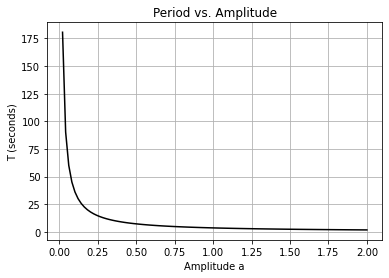

In [43]:
import matplotlib.pyplot as plt
import numpy as np
div =100
aval = linspace(0,2,div)
def f(x):
  return 1/(math.sqrt(V(aval[k1])-V(x)))
T = np.zeros(div,float)
k1 = s = 0
for k1 in range(1,div):
  array1,array2 = g(N,0,aval[k1])
  for k2 in range(0,N):
    s += f(array1[k2])*array2[k2]
  T[k1] = (math.sqrt(8*m))*s
  s=0
aval = np.delete(aval,0)
T = np.delete(T,0)
plt.grid()
plt.plot(aval,T, color ='black')
plt.ylabel("T (seconds)")
plt.xlabel("Amplitude a")
plt.title("Period vs. Amplitude")
plt.show()

### PROBLEM 5 (20 pts.)

**Differentiation using central difference**

1. Calculate the derivative of the function $1 + \frac{1}{2} \tanh 2x$ in the range $-2 \le x \le 2$ using central difference. Describe each step of the calculation clearly and concisely. *(10 pts.; 5 pts. for the code & 5 pts. for the discussion text)*

2. Calculate an analytic formula for the derivative and make a graph with your numerical result and the analytic answer on the same plot. Plot the exact answer as lines and the numerical one as dots. Describe how the two results compare. *(10 pts.; 5 pts. for the code & 5 pts. for the discussion text)*

1. Firstly I defined the necessary packages, then I defined the function f(x). I set the deviation h to $10^-5$ since with central difference, this value is of order 5 or even less. To take the derivative within the range $[-2,2]$, I set the variable x as a linspace from -2 to 2 with 100 divisions. I also set df as an empty array. I used a simple for loop to calculate the central difference value df for each value of x, and then plotted them to see the trend. It looks similar to a steep bell curve, with the maximum derivative of 1 obtained at $x = 0$.

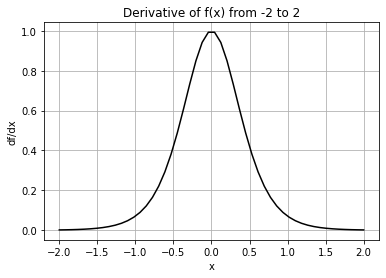

In [44]:
import matplotlib.pyplot as plt
import numpy as np
def f(x):
  return 1 + 0.5*np.tanh(2*x)
h=10**-5
divs=50
x=np.linspace(-2,2,divs)
df = np.zeros(divs,float)

for i in range(0,divs):
  df[i] = (f(x[i]+h/2) -f(x[i]-h/2))/h

plt.grid()
plt.plot(x,df, color ='black')
plt.ylabel("df/dx")
plt.xlabel("x")
plt.title("Derivative of f(x) from -2 to 2")
plt.show()

2. The derivative of the given function is $g(x) = sech^2(2x)$. I used an array 'dg' to store the value of g for every value of x within the range. I then plotted the values of dg as a line, while the values of dx as points to see their difference. It can be seen from the graph that central difference is very accurate, with the differences of values at an order of -11 or lower. I created a separate graph to show the absolute differences and they were all negligible and very very small.

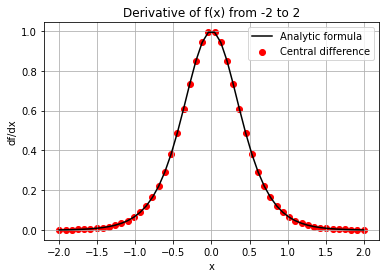

In [34]:
def g(x):
  return (np.cosh(2*x))**-2

dg = np.zeros(divs,float)

for k in range(0,divs):
  dg[k] = g(x[k])

plt.grid()
plt.scatter(x,df, color ='red', label = 'Central difference')
plt.plot(x,dg, color ='black', label='Analytic formula')
plt.ylabel("df/dx")
plt.xlabel("x")
plt.legend(loc='upper right', frameon=True)
plt.title("Derivative of f(x) from -2 to 2")
plt.show()

Text(0.5, 0, 'x')

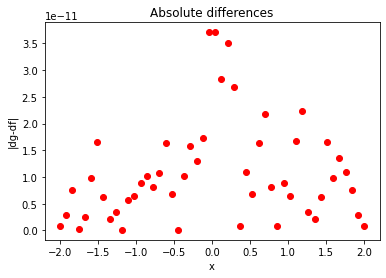

In [46]:
plt.scatter(x,abs(dg-df), color ='red', label = 'Central difference')
plt.title("Absolute differences")
plt.ylabel("|dg-df|")
plt.xlabel("x")